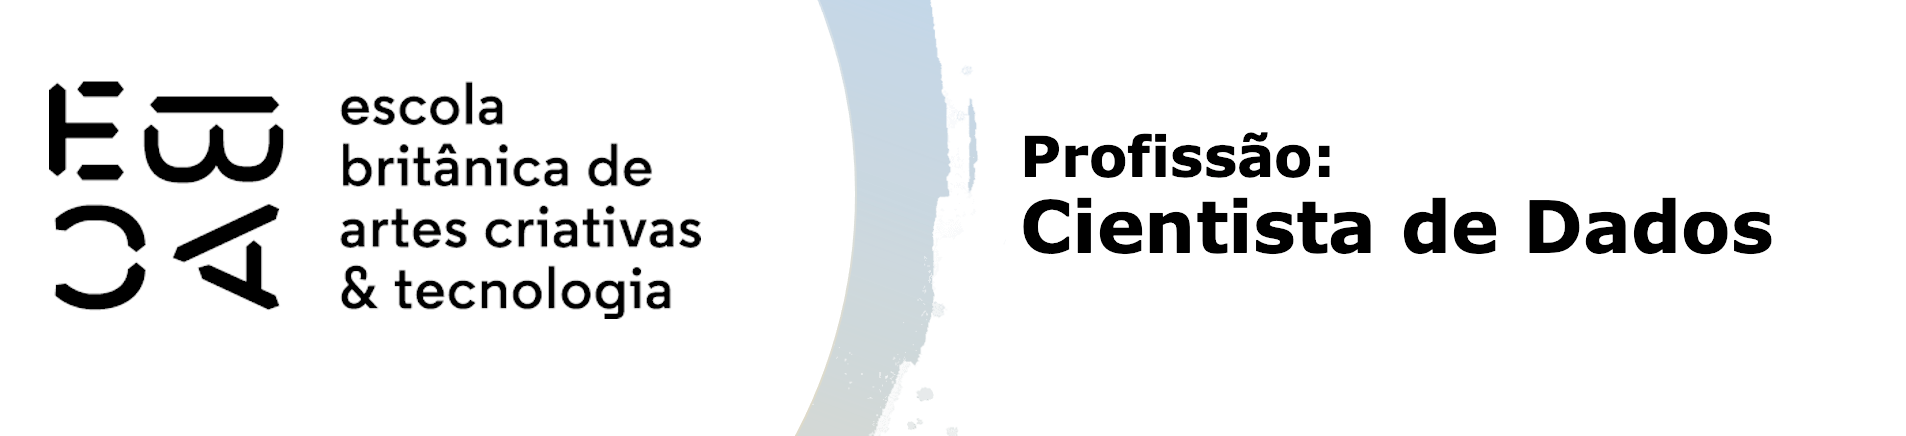

# Métodos hierárquicos de agrupamento - Tarefa

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [11]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


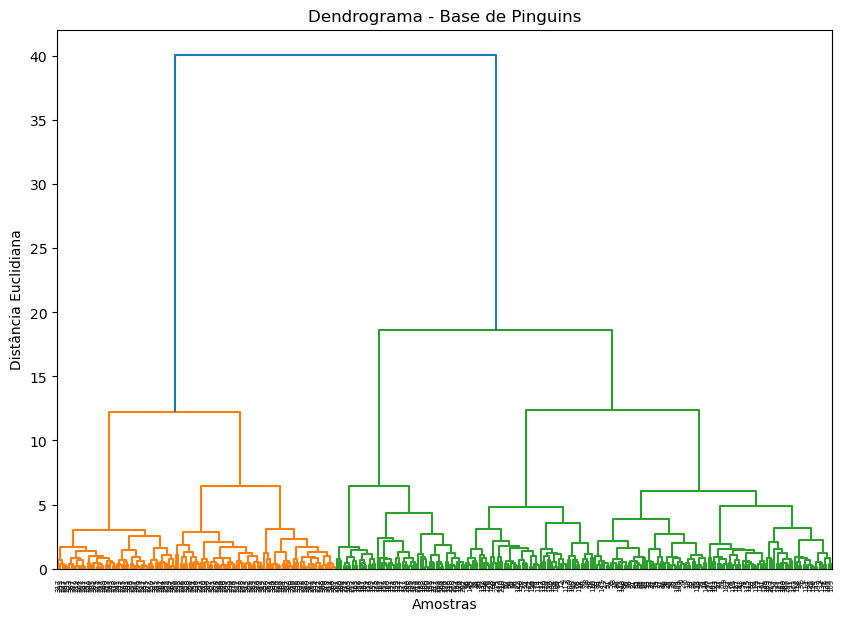

In [13]:
# Selecionar variáveis quantitativas
quantitative_vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_quant = penguins[quantitative_vars]

# Eliminar valores faltantes
penguins_clean = penguins_quant.dropna()

# Padronizar as variáveis
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_clean)

# Agrupamento hierárquico
agg_clustering = AgglomerativeClustering(n_clusters=3)
clusters = agg_clustering.fit_predict(penguins_scaled)

# Dendrograma
plt.figure(figsize=(10, 7))
plt.title("Dendrograma - Base de Pinguins")
dendrogram = shc.dendrogram(shc.linkage(penguins_scaled, method='ward'))
plt.xlabel("Amostras")
plt.ylabel("Distância Euclidiana")
plt.show()

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [15]:
# Adicionar os rótulos de cluster ao DataFrame original (somente pinguins limpos)
penguins_clean['Cluster'] = clusters

# Contar o número de pinguins de cada espécie em cada grupo
species_counts = penguins.loc[penguins_clean.index, ['species']].copy()
species_counts['Cluster'] = clusters
species_summary = species_counts.groupby(['Cluster', 'species']).size().unstack(fill_value=0)
print("Contagem de espécies por grupo:")
print(species_summary)

# Descrever as variáveis quantitativas de cada grupo
group_summary = penguins_clean.groupby('Cluster').describe().T
print("\nResumo das variáveis quantitativas por grupo:")
print(group_summary)

Contagem de espécies por grupo:
species  Adelie  Chinstrap  Gentoo
Cluster                           
0           151         11       0
1             0          0     123
2             0         57       0

Resumo das variáveis quantitativas por grupo:
Cluster                            0            1            2
bill_length_mm    count   162.000000   123.000000    57.000000
                  mean     39.150000    47.504878    49.752632
                  std       2.936560     3.081857     2.710107
                  min      32.100000    40.900000    45.200000
                  25%      37.000000    45.300000    47.500000
                  50%      39.000000    47.300000    50.200000
                  75%      41.100000    49.550000    51.300000
                  max      46.900000    59.600000    58.000000
bill_depth_mm     count   162.000000   123.000000    57.000000
                  mean     18.287654    14.982114    18.601754
                  std       1.221127     0.981220    

C:\Users\Joel\AppData\Local\Temp\ipykernel_19688\637607780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean['Cluster'] = clusters


## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

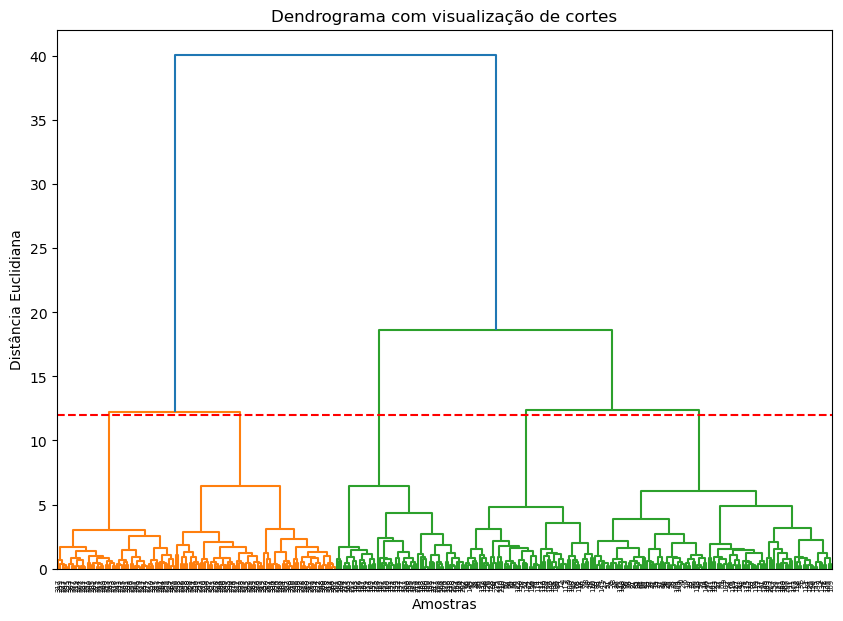

In [17]:
# Gerar o dendrograma novamente com um limite de distância para identificar grupos
plt.figure(figsize=(10, 7))
plt.title("Dendrograma com visualização de cortes")
dendrogram = shc.dendrogram(shc.linkage(penguins_scaled, method='ward'))
plt.axhline(y=12, color='r', linestyle='--')  # Alterar o valor de 'y' com base no dendrograma
plt.xlabel("Amostras")
plt.ylabel("Distância Euclidiana")
plt.show()

In [23]:
penguins_clean = penguins_clean.copy()

# Realizar o agrupamento com 4 grupos
agg_clustering_new = AgglomerativeClustering(n_clusters=4)
clusters_new = agg_clustering_new.fit_predict(penguins_scaled)

# Adicionar os novos rótulos ao DataFrame
penguins_clean['Cluster_New'] = clusters_new
clusters_new

array([1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1,
       3, 1, 3, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 2, 2, 2,
       2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [25]:
species_counts_new = penguins.loc[penguins_clean.index, ['species']].copy()
species_counts_new['Cluster_New'] = clusters_new
species_summary_new = species_counts_new.groupby(['Cluster_New', 'species']).size().unstack(fill_value=0)
print("Contagem de espécies por grupo (novo agrupamento):")
print(species_summary_new)

Contagem de espécies por grupo (novo agrupamento):
species      Adelie  Chinstrap  Gentoo
Cluster_New                           
0                 0          0     123
1                97          8       0
2                 0         57       0
3                54          3       0


In [27]:
# Combinar sexo e clusters
penguins_sex_counts = penguins.loc[penguins_clean.index, ['species', 'sex']].copy()
penguins_sex_counts['Cluster_New'] = clusters_new
sex_species_summary = penguins_sex_counts.groupby(['Cluster_New', 'species', 'sex']).size().unstack(fill_value=0)
print("\nContagem de espécies por sexo e grupo:")
print(sex_species_summary)


Contagem de espécies por sexo e grupo:
sex                    Female  Male
Cluster_New species                
0           Gentoo         58    61
1           Adelie         72    21
            Chinstrap       8     0
2           Chinstrap      23    34
3           Adelie          1    52
            Chinstrap       3     0


Se os clusters distinguirem principalmente por espécie, isso pode indicar que o algoritmo capturou diferenças naturais entre características como tamanho do corpo e bico.